In [5]:
import pandas as pd
import seaborn as sns

In [6]:
data = pd.read_csv('C:\\Users\\gaurav\\Downloads\\ClassificationProblem1.txt',sep='\t')
data.head()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,C
0,1,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,...,-3433637453,10/4/1986,9/6/1992,2,1,706,305,1,2,0
1,2,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,...,609277486,2/24/1979,1/5/1983,1,1,423,206,18,7,1
2,3,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,...,-8977995005,1/12/1989,11/22/1986,2,1,703,315,1,4,0
3,4,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,...,4868760308,2/18/1982,6/10/1992,1,1,122,304,15,1,0
4,5,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,...,9757408267,4/10/1987,10/19/1985,1,1,486,240,1,1,0


In [7]:
#Checking for any missing values
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101180 entries, 0 to 101179
Data columns (total 24 columns):
Index    101180 non-null int64
F1       101180 non-null float64
F2       101180 non-null float64
F3       101180 non-null float64
F4       101180 non-null float64
F5       101180 non-null int64
F6       101180 non-null int64
F7       101180 non-null int64
F8       101180 non-null int64
F9       101180 non-null int64
F10      101180 non-null int64
F11      101180 non-null int64
F12      101180 non-null int64
F13      101180 non-null int64
F14      101180 non-null int64
F15      101180 non-null object
F16      101180 non-null object
F17      101180 non-null int64
F18      101180 non-null int64
F19      101180 non-null int64
F20      101180 non-null int64
F21      101180 non-null int64
F22      101180 non-null int64
C        101180 non-null int64
dtypes: float64(4), int64(18), object(2)
memory usage: 18.5+ MB


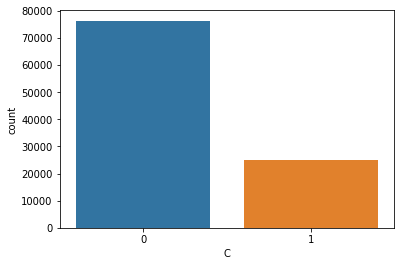

In [8]:
sns.countplot("C",data=data)

In [9]:
data['C'].value_counts()

0    76353
1    24827
Name: C, dtype: int64

In [10]:

#UPsampling to make the observations from both classes qual
from sklearn.utils import resample
df_majority = data[data.C==0]
df_minority = data[data.C==1]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=76353,
                                 random_state=123) 
FinalData = pd.concat([df_majority, df_minority_upsampled])
FinalData.C.value_counts()

1    76353
0    76353
Name: C, dtype: int64

In [22]:
FinalData.corr(method='spearman')

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F17,F18,F19,F20,F21,F22,C
F1,1.000000,0.003441,-0.001344,0.002995,0.002217,-0.005812,-0.004074,0.007443,-0.003568,0.004121,-0.001366,0.004102,0.000949,-0.001588,0.000758,-0.001347
F2,0.003441,1.000000,0.001531,0.004310,-0.000065,-0.005842,0.006106,0.001530,0.001135,-0.002215,0.001563,0.002240,0.003053,0.001853,-0.002412,-0.031368
F3,-0.001344,0.001531,1.000000,0.000783,0.005967,0.000490,-0.002404,0.002641,0.004493,-0.002485,-0.001922,0.000694,-0.002557,0.002235,-0.002952,0.002131
F4,0.002995,0.004310,0.000783,1.000000,-0.000719,0.000144,0.001982,-0.001200,-0.000316,-0.005494,-0.005024,-0.002222,-0.001413,-0.004362,-0.004952,0.045398
F5,0.002217,-0.000065,0.005967,-0.000719,1.000000,0.002826,0.000570,0.005231,-0.001887,-0.001599,-0.004210,-0.001751,-0.004841,-0.003346,0.000778,0.002883
F6,-0.005812,-0.005842,0.000490,0.000144,0.002826,1.000000,0.001711,0.006200,0.003784,0.000783,-0.002200,0.004563,-0.000764,0.001605,-0.004889,0.003304
F7,-0.004074,0.006106,-0.002404,0.001982,0.000570,0.001711,1.000000,0.002898,-0.000617,-0.000745,-0.002148,0.000276,-0.000373,0.000705,-0.004897,-0.001838
F8,0.007443,0.001530,0.002641,-0.001200,0.005231,0.006200,0.002898,1.000000,0.002566,-0.002219,0.003006,-0.004687,0.001473,-0.003540,0.001499,-0.000448
F9,-0.003568,0.001135,0.004493,-0.000316,-0.001887,0.003784,-0.000617,0.002566,1.000000,-0.005704,-0.000246,-0.005707,-0.004503,-0.003158,0.001011,0.006226
F17,0.004121,-0.002215,-0.002485,-0.005494,-0.001599,0.000783,-0.000745,-0.002219,-0.005704,1.000000,0.097038,0.620825,0.061634,0.004258,0.001293,-0.253643


In [11]:
FinalData=FinalData.drop(['Index','F14','F15','F16','F10','F11','F12','F13'],axis=1)

In [12]:
FinalData.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F17,F18,F19,F20,F21,F22,C
0,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,2,1,706,305,1,2,0
2,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,2,1,703,315,1,4,0
3,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,1,1,122,304,15,1,0
4,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,1,1,486,240,1,1,0
5,0.922726,0.600115,0.616261,0.339285,-6554,8770,1065,-9720,5801,4,1,806,157,6,5,0


In [13]:
y=FinalData['C']
X=FinalData.drop(['C'],axis=1)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2018)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
logistic=LogisticRegression()
logistic.fit(X_train,y_train)
y_pred=logistic.predict(X_test)

C:\Users\sagar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,cohen_kappa_score

In [19]:
print("Accuracy score is",accuracy_score(y_test,y_pred))
print("Classification score is",classification_report(y_test,y_pred))
print("Confusion matrix is",confusion_matrix(y_test,y_pred))
print("Cohen kappa is",cohen_kappa_score(y_test,y_pred))

Accuracy score is 0.672181961058238
Classification score is               precision    recall  f1-score   support

           0       0.80      0.46      0.58     22974
           1       0.62      0.89      0.73     22838

   micro avg       0.67      0.67      0.67     45812
   macro avg       0.71      0.67      0.66     45812
weighted avg       0.71      0.67      0.66     45812

Confusion matrix is [[10544 12430]
 [ 2588 20250]]
Cohen kappa is 0.34519338277887057


In [20]:
from xgboost import XGBClassifier

In [21]:
basicmodel=XGBClassifier(max_depth=25, silent=False, n_estimators=200,objective="multi:softprob",num_class=3)
basicmodel.fit(X_train, y_train)
y_pred = basicmodel.predict(X_test)


[17:45:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 13556 extra nodes, 0 pruned nodes, max_depth=25
[17:45:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 11424 extra nodes, 0 pruned nodes, max_depth=25
[17:45:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:45:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14398 extra nodes, 0 pruned nodes, max_depth=25
[17:45:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12574 extra nodes, 0 pruned nodes, max_depth=25
[17:45:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[17:45:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: 

In [23]:
print("Accuracy score is",accuracy_score(y_test,y_pred))
print("Classification score is",classification_report(y_test,y_pred))
print("Confusion matrix is",confusion_matrix(y_test,y_pred))
print("Cohen kappa is",cohen_kappa_score(y_test,y_pred))

Accuracy score is 0.8797258360254955
Classification score is               precision    recall  f1-score   support

           0       0.91      0.84      0.88     22974
           1       0.85      0.91      0.88     22838

   micro avg       0.88      0.88      0.88     45812
   macro avg       0.88      0.88      0.88     45812
weighted avg       0.88      0.88      0.88     45812

Confusion matrix is [[19410  3564]
 [ 1946 20892]]
Cohen kappa is 0.7594999842946774


In [24]:
import pickle

In [25]:
pickle.dump(basicmodel, open('C:\\Users\\gaurav\\Desktop\\model', 'wb'))